# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from pprint import pprint

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

tempunits="imperial"

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
MaxTemp=[]
WindSpeed=[]

setnumber=0
recordnumber=0

print("Beginning Data Retrieval")     
print("-----------------------------")

#Loop through the random cities from citipy
for city in cities:
    
    #Not all states will be found on openweather and we want the code to keep looping so make a try
    try:
        #Use openweather api
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + tempunits
        weather_response = requests.get(query_url).json()
        
        #append lists - need to store to put info into df
        City.append(weather_response["name"])
        Cloudiness.append(weather_response["clouds"]["all"])
        Country.append(weather_response["sys"]["country"])
        Date.append(weather_response["dt"])
        Humidity.append(weather_response["main"]["humidity"])
        Lat.append(weather_response["coord"]["lat"])
        Lng.append(weather_response["coord"]["lon"])
        MaxTemp.append(weather_response["main"]["temp_max"])
        WindSpeed.append(weather_response["wind"]["speed"])
        
        if recordnumber>=49:
            recordnumber=1
            setnumber+=1
        elif recordnumber<49:
            recordnumber+=1
            
        print(f'Processing Record {recordnumber} of Set {setnumber} | {city}')
    
    #If city isn't found
    except:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 0 | sioux lookout
Processing Record 2 of Set 0 | hilo
Processing Record 3 of Set 0 | barrow
Processing Record 4 of Set 0 | udachnyy
City not found. Skipping...
Processing Record 5 of Set 0 | port elizabeth
Processing Record 6 of Set 0 | albany
Processing Record 7 of Set 0 | butaritari
Processing Record 8 of Set 0 | wladyslawowo
Processing Record 9 of Set 0 | hermanus
Processing Record 10 of Set 0 | fairbanks
Processing Record 11 of Set 0 | san cristobal
Processing Record 12 of Set 0 | qaanaaq
Processing Record 13 of Set 0 | chokurdakh
Processing Record 14 of Set 0 | saint-philippe
Processing Record 15 of Set 0 | kloulklubed
Processing Record 16 of Set 0 | tuktoyaktuk
Processing Record 17 of Set 0 | hualmay
Processing Record 18 of Set 0 | new norfolk
Processing Record 19 of Set 0 | arraial do cabo
Processing Record 20 of Set 0 | buchanan
Processing Record 21 of Set 0 | urengoy
Processing Record 22 of Set 0

Processing Record 38 of Set 3 | nikolskoye
Processing Record 39 of Set 3 | yellowknife
Processing Record 40 of Set 3 | zhigansk
City not found. Skipping...
Processing Record 41 of Set 3 | jaguarari
Processing Record 42 of Set 3 | borger
Processing Record 43 of Set 3 | hami
Processing Record 44 of Set 3 | catamarca
Processing Record 45 of Set 3 | ust-tsilma
Processing Record 46 of Set 3 | kimbe
Processing Record 47 of Set 3 | pahrump
Processing Record 48 of Set 3 | mingshui
Processing Record 49 of Set 3 | ponta delgada
Processing Record 1 of Set 4 | bredasdorp
Processing Record 2 of Set 4 | santiago de cao
Processing Record 3 of Set 4 | poya
Processing Record 4 of Set 4 | venice
Processing Record 5 of Set 4 | mukhtolovo
Processing Record 6 of Set 4 | planadas
Processing Record 7 of Set 4 | teguldet
Processing Record 8 of Set 4 | coihaique
Processing Record 9 of Set 4 | gondar
Processing Record 10 of Set 4 | cheremisinovo
Processing Record 11 of Set 4 | tigil
Processing Record 12 of Set 

Processing Record 30 of Set 7 | high level
Processing Record 31 of Set 7 | anadyr
Processing Record 32 of Set 7 | khatanga
City not found. Skipping...
Processing Record 33 of Set 7 | stevens point
Processing Record 34 of Set 7 | toamasina
Processing Record 35 of Set 7 | hasaki
Processing Record 36 of Set 7 | kamenka
Processing Record 37 of Set 7 | aguimes
Processing Record 38 of Set 7 | awbari
Processing Record 39 of Set 7 | knysna
Processing Record 40 of Set 7 | port augusta
Processing Record 41 of Set 7 | antalaha
Processing Record 42 of Set 7 | baherden
Processing Record 43 of Set 7 | yatou
Processing Record 44 of Set 7 | baruun-urt
Processing Record 45 of Set 7 | surt
Processing Record 46 of Set 7 | sabinas hidalgo
Processing Record 47 of Set 7 | dudinka
Processing Record 48 of Set 7 | boffa
Processing Record 49 of Set 7 | praya
City not found. Skipping...
Processing Record 1 of Set 8 | manggar
Processing Record 2 of Set 8 | coolum beach
Processing Record 3 of Set 8 | skibbereen
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create DataFrame
weather_information={"City":City, "Cloudiness":Cloudiness, "Country": Country, "Date": Date, "Humidity": Humidity,"Lat":Lat,
                    "Lng":Lng,"Max Temp":MaxTemp, "Wind Speed":WindSpeed}
weather_df=pd.DataFrame(weather_information)
weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [5]:
#Display DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sioux Lookout,75,CA,1586541570,50,50.10,-91.92,30.2,4.70
1,Hilo,90,US,1586541577,73,19.73,-155.09,72.0,3.36
2,Barrow,75,US,1586541577,91,71.29,-156.79,-14.8,5.82
3,Udachny,12,RU,1586541577,62,66.42,112.40,24.8,8.95
4,Port Elizabeth,77,ZA,1586541578,88,-33.92,25.57,62.6,9.17


In [6]:
#Exporting DataFrame to csv
weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

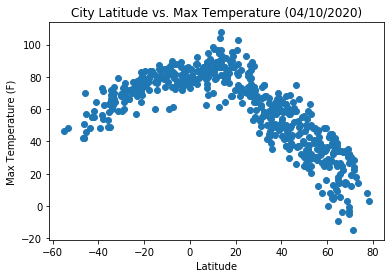

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])


today = date.today().strftime("%m/%d/%Y")

#pull date from time module
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

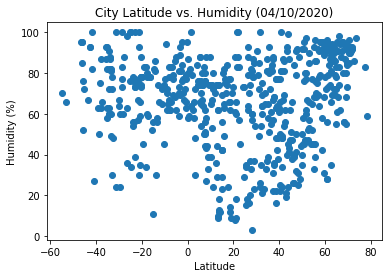

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

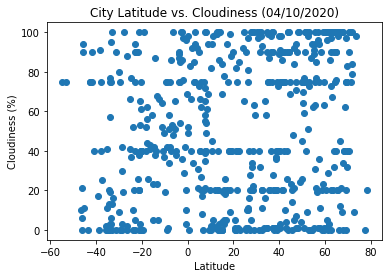

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

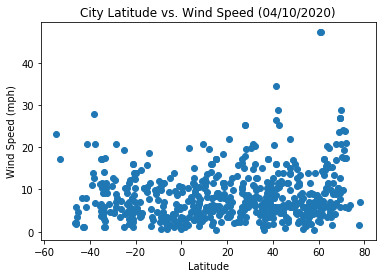

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern Hemisphere DataFrame (greater than or equal to 0 degrees latitude)
northernhem=weather_df.loc[weather_df["Lat"]>=0]
northernhem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sioux Lookout,75,CA,1586541570,50,50.10,-91.92,30.2,4.70
1,Hilo,90,US,1586541577,73,19.73,-155.09,72.0,3.36
2,Barrow,75,US,1586541577,91,71.29,-156.79,-14.8,5.82
3,Udachny,12,RU,1586541577,62,66.42,112.40,24.8,8.95
5,Albany,75,US,1586541302,56,42.60,-73.97,46.0,25.28


In [13]:
# Create Southern Hemisphere DataFrame (less than 0 degrees latitude)
southernhem=weather_df.loc[weather_df["Lat"]<0]
southernhem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Port Elizabeth,77,ZA,1586541578,88,-33.92,25.57,62.60,9.17
8,Hermanus,2,ZA,1586541578,91,-34.42,19.23,64.99,3.69
13,Saint-Philippe,20,RE,1586541579,74,-21.36,55.77,78.80,16.11
16,Hualmay,64,PE,1586541412,65,-11.10,-77.61,78.39,8.86
17,New Norfolk,75,AU,1586541579,93,-42.78,147.06,55.40,1.12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.7994134119403986


Text(0, 0.5, 'Max Temp')

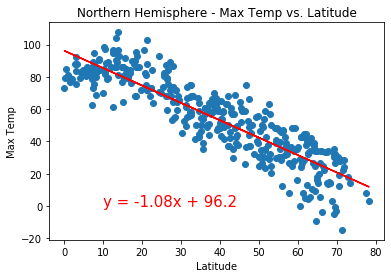

In [14]:
# Calculate the linear regression model for Northern Hemisphere - Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Max Temp'])
print(f'The r-squared value is {rvalue*rvalue}')


#Round terms in the regression and change to strings for the annotate function
regression=northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Max Temp'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(10,0),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6201533084379806


Text(0, 0.5, 'Max Temp')

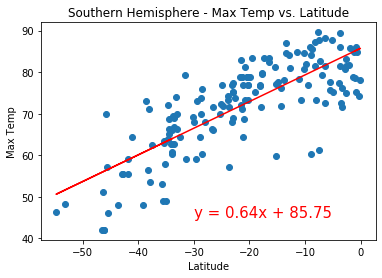

In [15]:
# Calculate the linear regression model for Southern Hemisphere - Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Max Temp'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Max Temp'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-30,45),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.07934950804756981


Text(0, 0.5, 'Humidity')

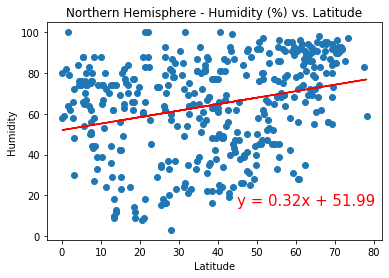

In [16]:
# Calculate the linear regression model for Northern Hemisphere - Humidity vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Humidity'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Humidity'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(45,15),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 5.95104937089582e-05


Text(0, 0.5, 'Humidity')

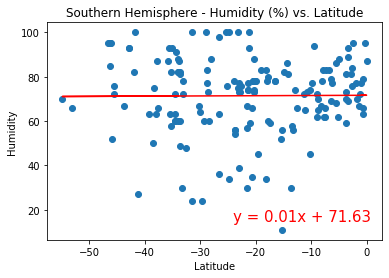

In [17]:
# Calculate the linear regression model for Southern Hemisphere - Humidity vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Humidity'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Humidity'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-24,15),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.018991011565904038


Text(0, 0.5, 'Cloudiness')

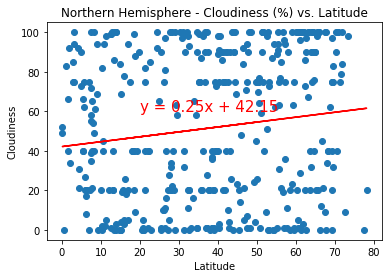

In [18]:
# Calculate the linear regression model for Northern Hemisphere - Cloudiness vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Cloudiness'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Cloudiness'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(20,60),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.05160878757207924


Text(0, 0.5, 'Cloudiness')

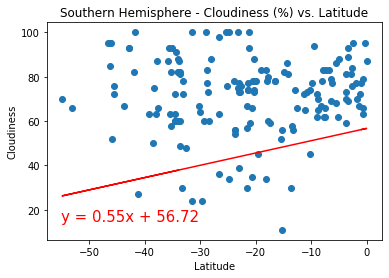

In [19]:
# Calculate the linear regression model for Southern Hemisphere - Cloudiness vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Cloudiness'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Humidity'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-55,15),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.031132993534348764


Text(0, 0.5, 'Wind Speed')

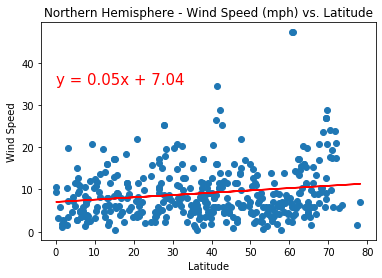

In [20]:
# Calculate the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(northernhem['Lat'],northernhem['Wind Speed'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = northernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(northernhem['Lat'],northernhem['Wind Speed'])
#Plot the regression
plt.plot(northernhem['Lat'],regression,color="red")
plt.annotate(y_values,(0,35),fontsize=15,color="red")

#Format
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.05805692740979786


Text(0, 0.5, 'Wind Speed')

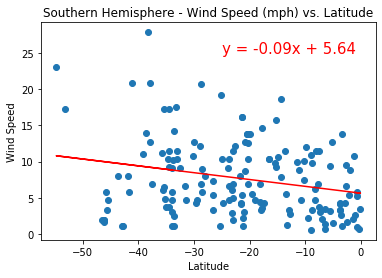

In [21]:
# Calculate the linear regression model for Southern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr)=linregress(southernhem['Lat'],southernhem['Wind Speed'])
print(f'The r-squared value is {rvalue*rvalue}')

regression = southernhem['Lat']*slope+intercept
y_values = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter
plt.scatter(southernhem['Lat'],southernhem['Wind Speed'])
#Plot the regression
plt.plot(southernhem['Lat'],regression,color="red")
plt.annotate(y_values,(-25,25),fontsize=15,color="red")

#Format
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')